In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_2018_19 = pd.read_csv('table-5/table-5-(2018-19).csv', header=12, low_memory=False)
data_2019_20 = pd.read_csv('table-5/table-5-(2019-20).csv', header=12, low_memory=False)
data_2020_21 = pd.read_csv('table-5/table-5-(2020-21).csv', header=12, low_memory=False)
data_2021_22 = pd.read_csv('table-5/table-5-(2021-22).csv', header=12, low_memory=False)
data_2022_23 = pd.read_csv('table-5/table-5-(2022-23).csv', header=12, low_memory=False)  
data_2023_24 = pd.read_csv('table-5/table-5-(2023-24).csv', header=12, low_memory=False)

In [3]:
data_2018_19.dropna(subset='UKPRN', inplace=True)
data_2019_20.dropna(subset='UKPRN', inplace=True)
data_2020_21.dropna(subset='UKPRN', inplace=True)
data_2021_22.dropna(subset='UKPRN', inplace=True)
data_2022_23.dropna(subset='UKPRN', inplace=True)
data_2023_24.dropna(subset='UKPRN', inplace=True)

In [4]:

# Detect rows where conversion to float fails
def is_convertible(val):
    try:
        float(val)
        return True
    except:
        return False

# Apply the function to the column
mask = data_2023_24['Value(£000s)'].apply(is_convertible)

# Rows with conversion issues
problematic_rows = data_2023_24[~mask]

problematic_rows

,UKPRN,HE Provider,Country of HE provider,Region of HE provider,Academic year,Financial year end,HESA cost centre marker,HESA cost centre,Source of income,Year End Month,Value(£000s)
1312,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,128 Politics & international studies,8 EU government bodies,"07, July",(1)
1336,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,128 Politics & international studies,8 EU government bodies,All,(1)
1408,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,130 Law,8 EU government bodies,"07, July",(18)
1432,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,130 Law,8 EU government bodies,All,(18)
2740,10007849.0,Abertay University,Scotland,Scotland,2023/24,2024-07-31,Academic departments,104 Psychology & behavioural sciences,1e Economic and Social Research Council (ESRC),"07, July",(13)
...,...,...,...,...,...,...,...,...,...,...,...
548148,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,126 Archaeology,4 UK central government bodies/local authoriti...,All,(1)
548276,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,129 Economics & econometrics,12 Non-EU-based charities (open competitive pr...,"07, July",(3)
548300,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,129 Economics & econometrics,12 Non-EU-based charities (open competitive pr...,All,(3)
548564,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,135 Education,12 Non-EU-based charities (open competitive pr...,"07, July",(5)


In [5]:
# Convert '(x)' to -x
data_2018_19['Value(£000s)'] = data_2018_19['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2019_20['Value(£000s)'] = data_2019_20['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2020_21['Value(£000s)'] = data_2020_21['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2021_22['Value(£000s)'] = data_2021_22['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2022_23['Value(£000s)'] = data_2022_23['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)

data_2023_24['Value(£000s)'] = data_2023_24['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)


In [6]:
data = pd.concat([data_2018_19, data_2019_20, data_2020_21, data_2021_22, data_2022_23, data_2023_24], ignore_index=True)

data = data.loc[data['HESA cost centre marker'] == 'Academic departments']


In [7]:
data['Year End Month'].unique()

data = data.loc[data['Year End Month'] == 'All']

In [8]:
data_group = data.groupby(['Academic year', 'HESA cost centre', 'Source of income'], as_index=False).agg({'Value(£000s)':'sum'})

In [9]:
data_pivot = data_group.pivot(index=['HESA cost centre', 'Source of income'], columns='Academic year', values='Value(£000s)').reset_index()

In [10]:
data_pivot['HESA cost centre'].unique()

array(['101 Clinical medicine', '102 Clinical dentistry',
       '103 Nursing & allied health professions',
       '104 Psychology & behavioural sciences',
       '105 Health & community studies', '106 Anatomy & physiology',
       '107 Pharmacy & pharmacology',
       '108 Sports science & leisure studies', '109 Veterinary science',
       '110 Agriculture, forestry & food science',
       '111 Earth, marine & environmental sciences', '112 Biosciences',
       '113 Chemistry', '114 Physics', '115 General engineering',
       '116 Chemical engineering',
       '117 Mineral, metallurgy & materials engineering',
       '118 Civil engineering',
       '119 Electrical, electronic & computer engineering',
       '120 Mechanical, aero & production engineering',
       '121 IT, systems sciences & computer software engineering',
       '122 Mathematics',
       '123 Architecture, built environment & planning',
       '124 Geography & environmental studies', '125 Area studies',
       '126 Arch

In [11]:
data_pivot['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [12]:
data_pivot[(data_pivot['HESA cost centre'].str.contains('Physics'))]

Academic year,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
312,114 Physics,"10 EU industry, commerce and public corporations",1868.0,2428.0,2360.0,2865.0,1075.0,1543.0
313,114 Physics,11 EU (excluding UK) other,3543.0,4462.0,5019.0,3939.0,4647.0,4321.0
314,114 Physics,12 Non-EU-based charities (open competitive pr...,1690.0,1514.0,1450.0,1841.0,1513.0,2208.0
315,114 Physics,"13 Non-EU industry, commerce and public corpor...",2871.0,3028.0,2118.0,2740.0,2867.0,3882.0
316,114 Physics,14 Non-EU other,17929.0,39865.0,32155.0,8731.0,12769.0,9894.0
317,114 Physics,15 Total,456255.0,417370.0,420354.0,399787.0,438630.0,455448.0
318,114 Physics,1a Biotechnology and Biological Sciences Resea...,2409.0,2845.0,3101.0,3066.0,2333.0,3502.0
319,114 Physics,1b Medical Research Council (MRC),2564.0,2644.0,4903.0,7600.0,10818.0,11597.0
320,114 Physics,1c Natural Environment Research Council (NERC),4446.0,4199.0,4641.0,5664.0,7174.0,7115.0
321,114 Physics,1d Engineering and Physical Sciences Research ...,159204.0,121936.0,97377.0,100299.0,103795.0,114558.0


In [13]:

# Filter rows where 'codes' match the pattern '1' followed by a letter
filtered_df = data_pivot[data_pivot['Source of income'].str.match(r'1[a-zA-Z]')]


In [14]:
filtered_df['Source of income'].unique()

array(['1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils'], dtype=object)

In [15]:
filtered_df.to_csv('filtered_data.csv', index=False)

In [16]:
filtered_df[filtered_df['HESA cost centre'].str.contains('Clinical medicine')].drop(columns=['HESA cost centre']).to_clipboard(index=False)

In [17]:
filtered_df[filtered_df['HESA cost centre'].str.contains('Physics')].to_clipboard(index=False)

In [18]:
data_pivot.to_csv("HESA_data_table5.csv", index=False)

In [19]:
data_physics = data_pivot[data_pivot['HESA cost centre'].str.contains('Physics')]

data_percentage = data_physics.copy()[~data_physics['Source of income'].str.contains('Total')]

data_percentage.drop(columns='HESA cost centre', inplace=True)
data_percentage.set_index('Source of income', inplace=True)

# Calculate percentage by column
data_percentage = data_percentage.div(data_percentage.sum(axis=0), axis=1) * 100

data_percentage.to_clipboard()

In [20]:
df_sample = filtered_df[filtered_df['Source of income'].str.contains('1j')].sort_values(by='2023/24', ascending=False).head(10).iloc[1:]


filtered_df[filtered_df['Source of income'].str.contains('1j')]

Academic year,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
15,101 Clinical medicine,1j Total Research Councils,416664.0,411073.0,454276.0,490047.0,487228.0,473455.0
39,102 Clinical dentistry,1j Total Research Councils,3554.0,2706.0,3533.0,5455.0,4850.0,4608.0
63,103 Nursing & allied health professions,1j Total Research Councils,6300.0,6052.0,8674.0,10380.0,11727.0,11452.0
87,104 Psychology & behavioural sciences,1j Total Research Councils,30046.0,30083.0,31192.0,35984.0,39230.0,39206.0
111,105 Health & community studies,1j Total Research Councils,5332.0,3649.0,4505.0,6136.0,6786.0,6913.0
135,106 Anatomy & physiology,1j Total Research Councils,13523.0,12445.0,13104.0,14053.0,15910.0,18406.0
159,107 Pharmacy & pharmacology,1j Total Research Councils,19894.0,16544.0,16300.0,17931.0,28239.0,20616.0
183,108 Sports science & leisure studies,1j Total Research Councils,2096.0,494.0,5826.0,2662.0,3814.0,3195.0
207,109 Veterinary science,1j Total Research Councils,29202.0,27056.0,25241.0,28244.0,25472.0,25966.0
231,"110 Agriculture, forestry & food science",1j Total Research Councils,28246.0,14581.0,19428.0,14944.0,21948.0,20490.0


In [21]:
sns.set_theme()
# Create an array with the colors you want to use
colors = ["#2E2D62", "#FF6900", "#00A788", "#1E5DF8", "#E355EC", "#3E863E", "#BE2BBB", "#008AAD", "#005E54", "#C13D33"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

style_dict = {'axes.facecolor': 'white',
              'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': False,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_style("whitegrid", style_dict)

(0.0, 510936.4)

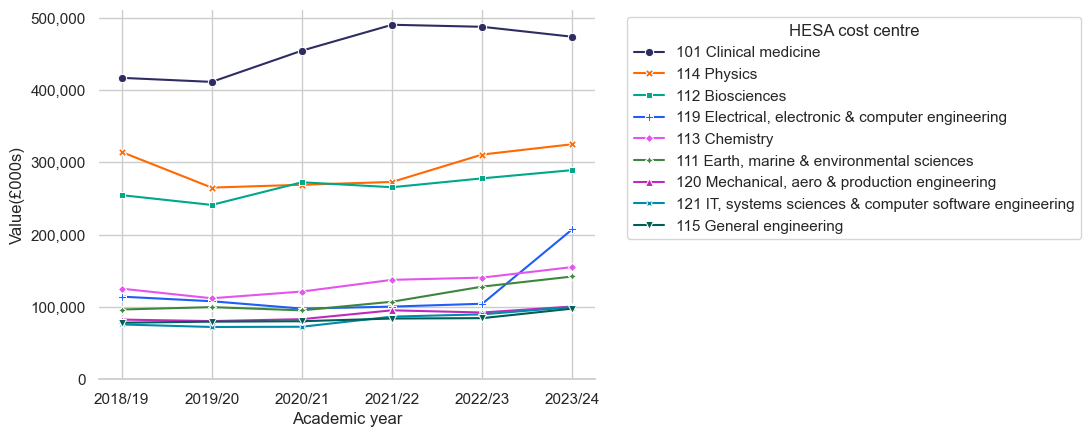

In [22]:
df_melt = df_sample.melt(id_vars=['HESA cost centre', 'Source of income'], var_name='Academic year', value_name='Value(£000s)')

sns.lineplot(data=df_melt, x='Academic year', y='Value(£000s)', hue='HESA cost centre', style='HESA cost centre', markers=True, dashes=False)

plt.legend(title='HESA cost centre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(bottom=0)


In [23]:
data_income_cc = data_pivot.copy()

# Remove leading digits and any whitespace after them
data_pivot['HESA cost centre'] = data_pivot['HESA cost centre'].str.replace(r'^\d+\s*', '', regex=True)

data_pivot.to_csv('HESA_cost_centre_income.csv', index=False)


In [24]:
# Split into UKRI Research Councils, and Other funding bodies

my_dict = {
    "10 EU industry, commerce and public corporations":"Other",
    "11 EU (excluding UK) other":"Other",
    "12 Non-EU-based charities (open competitive process)":"Other",
    "13 Non-EU industry, commerce and public corporations":"Other",
    "14 Non-EU other":"Other",
    "15 Total":"Total",
    "1a Biotechnology and Biological Sciences Research Council (BBSRC)":"UKRI",
    "1b Medical Research Council (MRC)":"UKRI",
    "1c Natural Environment Research Council (NERC)":"UKRI",
    "1d Engineering and Physical Sciences Research Council (EPSRC)":"UKRI",
    "1e Economic and Social Research Council (ESRC)":"UKRI",
    "1f Arts & Humanities Research Council (AHRC)":"UKRI",
    "1g Science & Technology Facilities Council (STFC)":"UKRI",
    "1h UK Research and Innovation":"UKRI",
    "1i Other":"Other",
    "1h Other":"Other",
    "1j Total Research Councils":"Total Research Councils",
    "1i Total Research Councils":"Total Research Councils",
    "2 UK-based charities (open competitive process)":"Other",
    "3 UK based charities (other)":"Other",
    "4 UK central government bodies/local authorities, health and hospital authorities":"Other",
    "5 UK central government tax credits for research and development expenditure":"Other",
    "6 UK industry, commerce and public corporations":"Other",
    "7 UK other sources":"Other",
    "8 EU government bodies":"Other",
    "9 EU-based charities (open competitive process)":"Other"
}

In [25]:
data_pivot['Source of income group'] = data_pivot['Source of income'].apply(lambda x: my_dict.get(x, x))

In [26]:
data_group = data_pivot.groupby(['HESA cost centre', 'Source of income group'], as_index=False).sum(numeric_only=True)

In [27]:
data_group.loc[data_group['Source of income group'] != 'Total Research Councils'].to_csv('HESA_cost_centre_income_grouped.csv', index=False)

In [28]:
data_pivot['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [29]:
data_group[(data_group['Source of income group'] == 'UKRI') & data_group['HESA cost centre'].isin(['Biosciences', 'Chemistry', 'Physics', 'Area studies', 'Modern languages'])]

#data_group['HESA cost centre'].unique()

Academic year,HESA cost centre,Source of income group,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
23,Area studies,UKRI,1712.0,1373.0,1081.0,766.0,1157.0,712.0
31,Biosciences,UKRI,241625.0,229380.0,258084.0,248559.0,260661.0,271168.0
47,Chemistry,UKRI,114566.0,101949.0,107028.0,121011.0,124894.0,138522.0
131,Modern languages,UKRI,11253.0,10131.0,8054.0,10314.0,12916.0,12436.0
151,Physics,UKRI,295913.0,245473.0,246824.0,248386.0,285668.0,298250.0


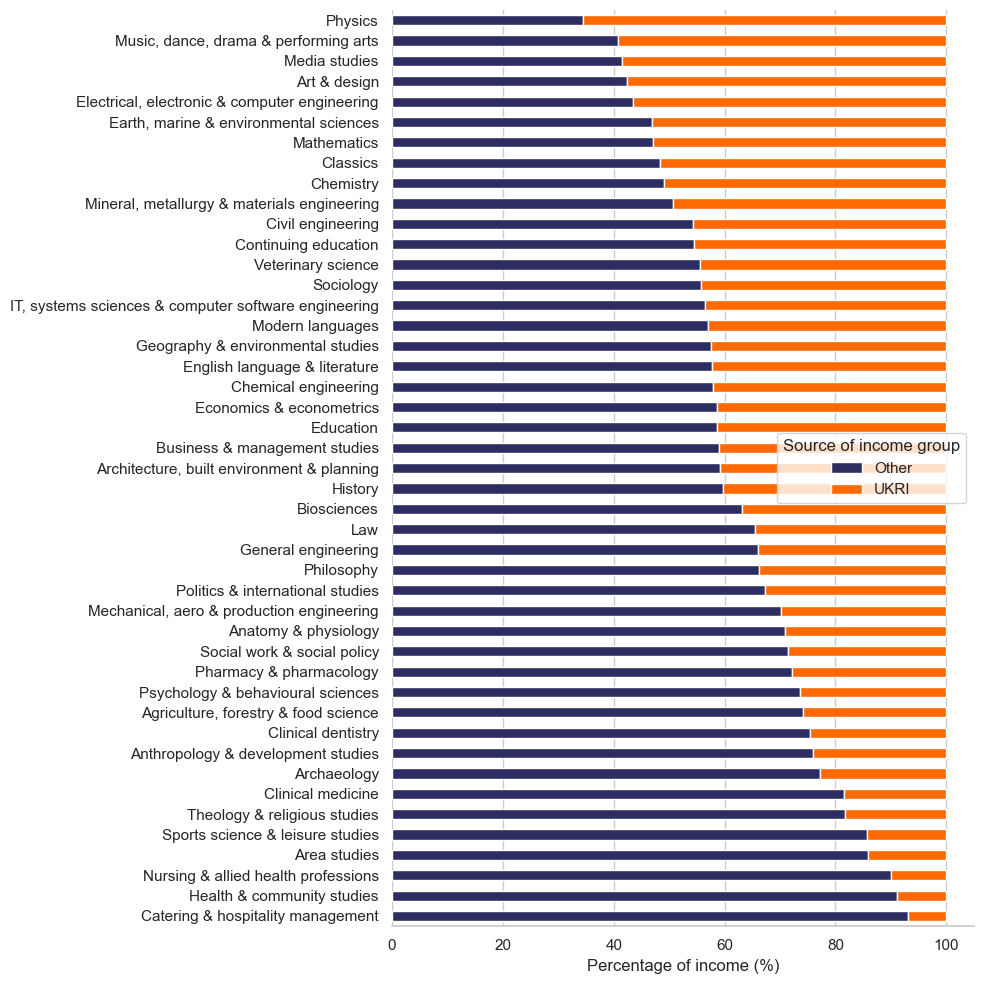

In [30]:
data_group['HESA cost centre'].unique()

data_percentage = data_group.copy()[~data_group['HESA cost centre'].str.contains('Total') & ~data_group['Source of income group'].str.contains('Total')]

data_percentage[data_percentage.columns[2:]] = data_percentage.groupby('HESA cost centre')[data_percentage.columns[2:]].transform(lambda x: x / x.sum() * 100)

data_percentage

data_hist = data_percentage.pivot(index='HESA cost centre', values='2023/24', columns='Source of income group').sort_values(by='UKRI')

plt.figure(figsize=(10,10))
data_hist.plot.barh(stacked=True, ax=plt.gca())

plt.ylabel('')
plt.xlabel('Percentage of income (%)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
data_percentage

# possibly want to show over time as well?

data_percentage[data_percentage['HESA cost centre'] == 'Physics']

Academic year,HESA cost centre,Source of income group,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
148,Physics,Other,35.143067,41.185758,41.281872,37.870416,34.872672,34.515027
151,Physics,UKRI,64.856933,58.814242,58.718128,62.129584,65.127328,65.484973


In [32]:

data_percentage = data_group.copy()[~data_group['HESA cost centre'].str.contains('Total') & ~data_group['Source of income group'].str.contains('Total')]

data_percentage[data_percentage.columns[2:]] = data_percentage.groupby('Source of income group')[data_percentage.columns[2:]].transform(lambda x: x / x.sum() * 100)

data_percentage['HESA cost centre'] = data_percentage['HESA cost centre'].str[4:]

# Remove leading digits and any whitespace after them
data_percentage['HESA cost centre'] = data_percentage['HESA cost centre'].str.replace(r'^\d+\s*', '', regex=True)


data_percentage.to_clipboard(index=False)



In [33]:
data_plot = data_group[data_group['Source of income group'] == 'UKRI'].sort_values(by='2023/24', ascending=False).head(11).iloc[1:]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2018-19'),
  Text(1, 0, '2019-20'),
  Text(2, 0, '2020-21'),
  Text(3, 0, '2021-22'),
  Text(4, 0, '2022-23'),
  Text(5, 0, '2023-24')])

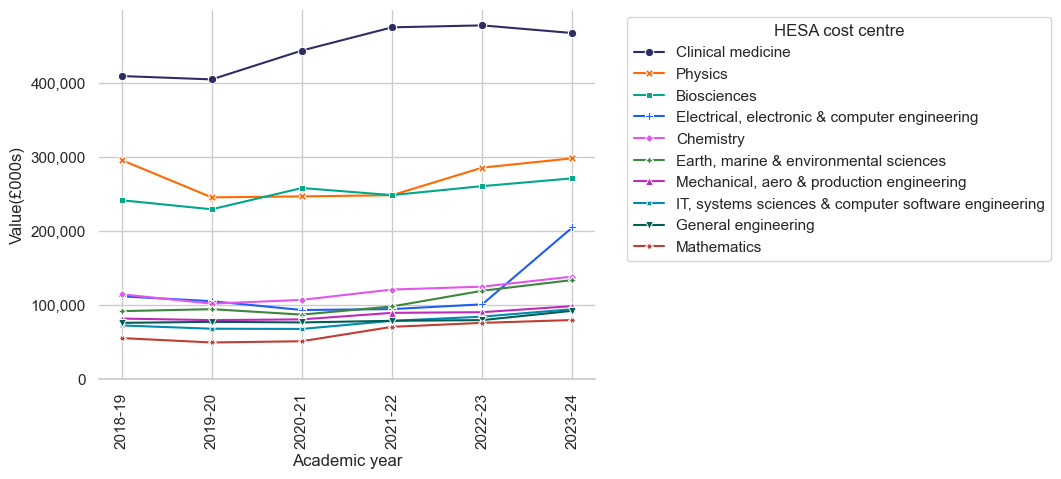

In [34]:
df_melt = data_plot.melt(id_vars=['HESA cost centre', 'Source of income group'], var_name='Academic year', value_name='Value(£000s)')
df_melt['Academic year'] = df_melt['Academic year'].str.replace('/', '-')

sns.lineplot(data=df_melt, x='Academic year', y='Value(£000s)', hue='HESA cost centre', style='HESA cost centre', markers=True, dashes=False)

plt.legend(title='HESA cost centre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(bottom=0)

plt.xticks(rotation=90)


In [35]:
# How does Physics compare?

data_physics = data_pivot[data_pivot['HESA cost centre'] == 'Physics']

data_physics['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [36]:
data_pivot['HESA cost centre'].unique()

cost_centres = ['Chemistry', 'Physics', 'Mathematics', 'General Engineering', 'Total academic departments']

In [37]:
data_pivot[data_pivot['Source of income group'] == 'UKRI']

data_group = data_pivot.groupby(['HESA cost centre', 'Source of income group'], as_index=False).sum(numeric_only=True)

data_hist = data_group[(data_group['Source of income group'] == 'UKRI') & ~data_group['HESA cost centre'].str.contains('Total')]

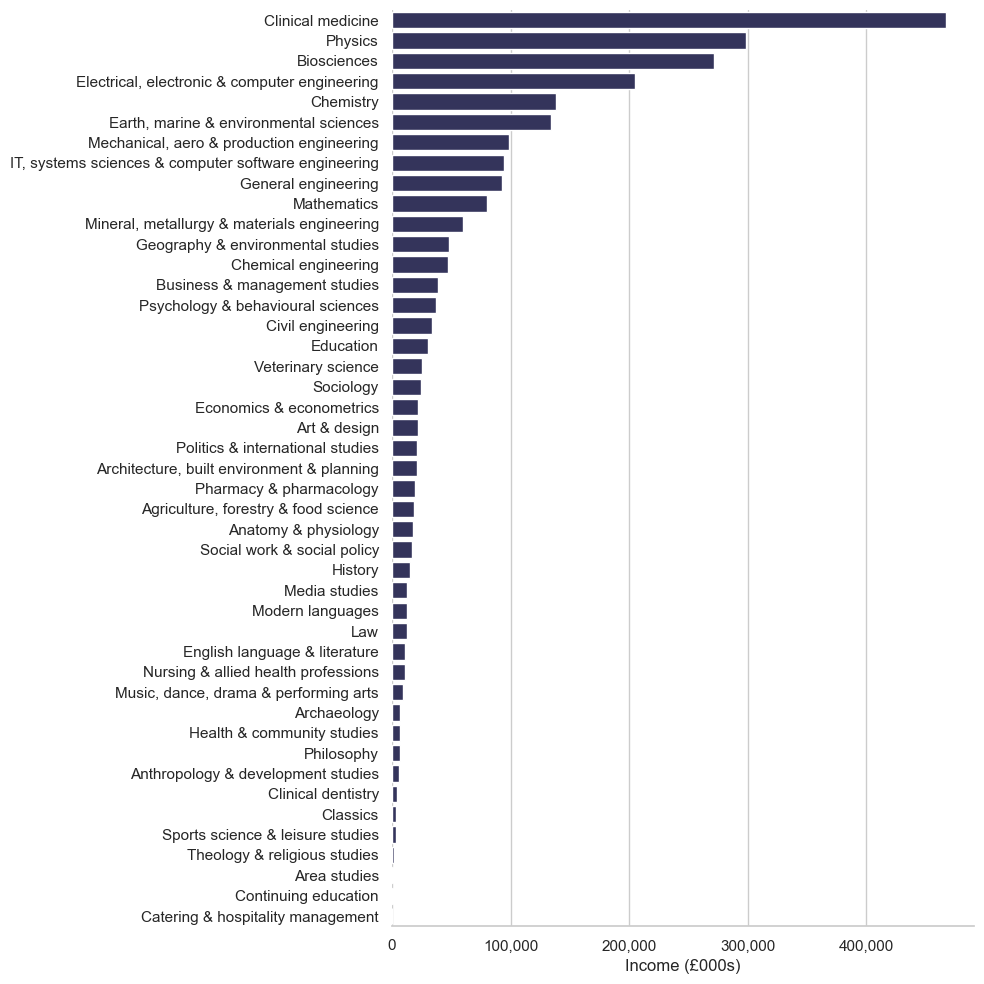

In [38]:
data_sort = data_hist.sort_values(by='2023/24', ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(data=data_sort, x='2023/24', y='HESA cost centre')
plt.ylabel('')
plt.xlabel('Income (£000s)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


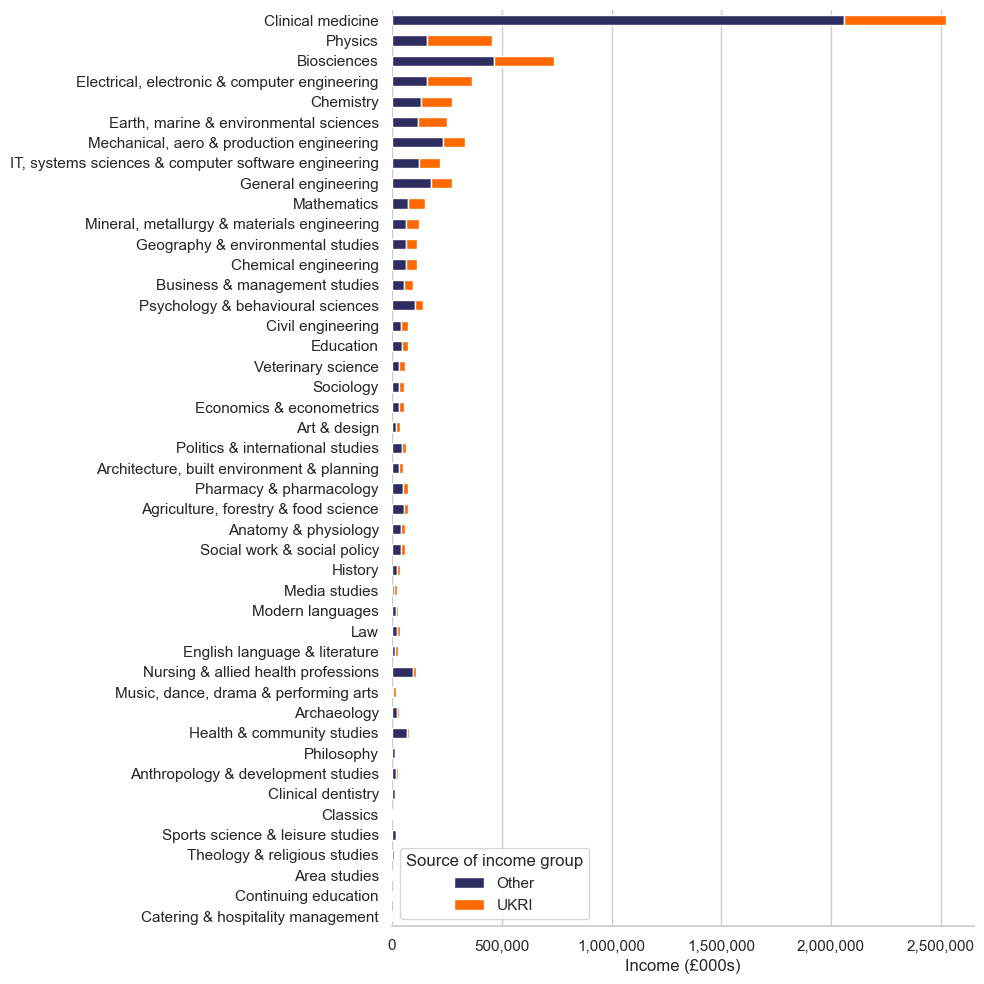

In [39]:
# UKRI and other in stacked histogram to show that UKRI amount varies depending on who else funds
# option 1 as above by UKRI and Other stacked.

data_hist = data_group[(data_group['Source of income group'].isin(['UKRI', 'Other'])) & ~data_group['HESA cost centre'].str.contains('Total')]
data_hist = data_hist.pivot(index='HESA cost centre', values='2023/24', columns='Source of income group').sort_values(by='UKRI')


plt.figure(figsize=(10,10))
data_hist.plot.barh(stacked=True, ax=plt.gca())

plt.ylabel('')
plt.xlabel('Income (£000s)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Axes: xlabel='Academic year'>

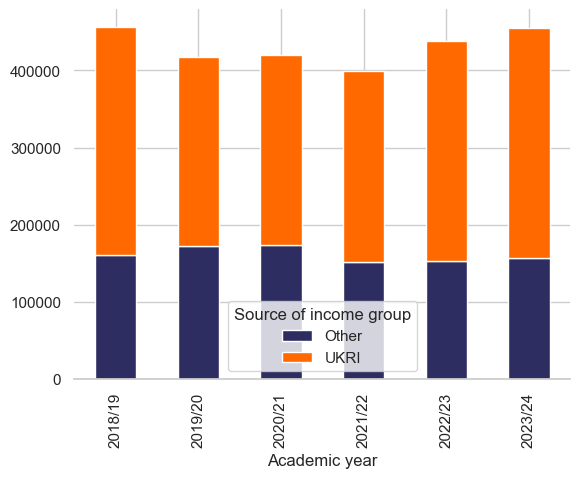

In [40]:
data_physics_hist = data_group[(data_group['HESA cost centre'] == 'Physics') & data_group['Source of income group'].isin(['Other', 'UKRI'])]

data_pivot = data_physics_hist.melt(id_vars=['HESA cost centre', 'Source of income group']).pivot(index='Academic year', columns='Source of income group', values='value')

data_pivot.plot.bar(stacked=True)

In [41]:
data_group

Academic year,HESA cost centre,Source of income group,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
0,"Agriculture, forestry & food science",Other,39933.0,33779.0,42946.0,39548.0,59067.0,54214.0
1,"Agriculture, forestry & food science",Total,68081.0,48213.0,58188.0,53943.0,79878.0,73081.0
2,"Agriculture, forestry & food science",Total Research Councils,28246.0,14581.0,19428.0,14944.0,21948.0,20490.0
3,"Agriculture, forestry & food science",UKRI,28148.0,14434.0,15242.0,14395.0,20811.0,18867.0
4,Anatomy & physiology,Other,44657.0,40239.0,39133.0,41732.0,40346.0,42186.0
...,...,...,...,...,...,...,...,...
179,Total academic departments,UKRI,2058584.0,1939833.0,2057628.0,2165350.0,2320495.0,2506384.0
180,Veterinary science,Other,35649.0,41570.0,52753.0,36270.0,32142.0,31673.0
181,Veterinary science,Total,64578.0,68568.0,77930.0,64259.0,57118.0,57043.0
182,Veterinary science,Total Research Councils,29202.0,27056.0,25241.0,28244.0,25472.0,25966.0


In [42]:
uoa_cc_mapping = pd.read_excel('ref_cc_mapping.xlsx', header=4)


/opt/anaconda3/envs/myenv/lib/python3.13/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [43]:
uoa_cc_mapping.columns = ['UoA_code', 'UoA', 'HESA cost centre code', 'HESA cost centre']

In [44]:
uoa_cc_mapping['HESA cost centre'].str.replace(' or', ',')

0                                     Clinical medicine
1        Clinical dentistry, Health & community studies
2     Clinical dentistry, Nursing & allied health pr...
3                     Psychology & behavioural sciences
4     Anatomy & physiology, Biosciences, Anthropolog...
5     Veterinary science, Agriculture, forestry & fo...
6                Earth, marine & environmental sciences
7                                             Chemistry
8                                               Physics
9                                           Mathematics
10    IT, systems sciences & computer software engin...
11    General engineering, Chemical engineering, Min...
12           Architecture, built environment & planning
13    Earth, marine & environmental sciences, Geogra...
14                                          Archaeology
15                             Economics & econometrics
16                        Business & management studies
17                                              

In [45]:
data_income_cc

data_income_cc['HESA cost centre'].str.find(r'^\d+\s*')

data_income_cc['HESA cost centre code'] = data_income_cc['HESA cost centre'].str.extract(r'(\d+)')

data_income_cc['HESA cost centre code'][0]

'101'

In [46]:
uoa_cc_mapping['HESA cost centre code'] = uoa_cc_mapping['HESA cost centre code'].astype(str).str.replace(' or', ',', regex=False)

In [47]:
import ast

uoa_cc_mapping['HESA cost centre list'] =  '[' + uoa_cc_mapping['HESA cost centre code'] + ']'

# Convert string to actual list using ast.literal_eval
uoa_cc_mapping['HESA cost centre list'] = uoa_cc_mapping['HESA cost centre list'].apply(ast.literal_eval)


In [48]:
uoa_cc_explode = uoa_cc_mapping.explode('HESA cost centre list')


In [49]:
uoa_cc = pd.merge(uoa_cc_explode, uoa_cc_explode['HESA cost centre list'].value_counts(), on='HESA cost centre list')

uoa_cc['weight'] = 1/uoa_cc['count']

uoa_cc.drop(columns=['HESA cost centre code', 'HESA cost centre', 'count'], inplace=True)

uoa_cc.rename(columns={'HESA cost centre list':'HESA cost centre code'}, inplace=True)

In [50]:
uoa_cc['HESA cost centre code'] = uoa_cc['HESA cost centre code'].astype(int)


In [51]:

data_income_cc.dropna(subset='HESA cost centre code', inplace=True)

data_income_cc['HESA cost centre code'] = data_income_cc['HESA cost centre code'].astype(int)

In [52]:
data_uoa_cc = pd.merge(data_income_cc, uoa_cc, on='HESA cost centre code', how='outer', indicator=True)



In [53]:
data_uoa_cc[data_uoa_cc['_merge'] != 'both'] # does not include Catering and hospitality management and Continuing Education

,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,HESA cost centre code,UoA_code,UoA,weight,_merge
888,134 Catering & hospitality management,"10 EU industry, commerce and public corporations",0.0,3.0,0.0,0.0,-10.0,20.0,134,NaN,NaN,NaN,left_only
889,134 Catering & hospitality management,11 EU (excluding UK) other,45.0,52.0,6.0,62.0,19.0,47.0,134,NaN,NaN,NaN,left_only
890,134 Catering & hospitality management,12 Non-EU-based charities (open competitive pr...,0.0,0.0,0.0,0.0,5.0,1.0,134,NaN,NaN,NaN,left_only
891,134 Catering & hospitality management,"13 Non-EU industry, commerce and public corpor...",0.0,0.0,0.0,0.0,0.0,0.0,134,NaN,NaN,NaN,left_only
892,134 Catering & hospitality management,14 Non-EU other,0.0,6.0,19.0,5.0,21.0,0.0,134,NaN,NaN,NaN,left_only
893,134 Catering & hospitality management,15 Total,359.0,712.0,413.0,358.0,1022.0,288.0,134,NaN,NaN,NaN,left_only
894,134 Catering & hospitality management,1a Biotechnology and Biological Sciences Resea...,0.0,0.0,0.0,0.0,0.0,0.0,134,NaN,NaN,NaN,left_only
895,134 Catering & hospitality management,1b Medical Research Council (MRC),0.0,0.0,0.0,0.0,0.0,0.0,134,NaN,NaN,NaN,left_only
896,134 Catering & hospitality management,1c Natural Environment Research Council (NERC),0.0,0.0,0.0,0.0,0.0,0.0,134,NaN,NaN,NaN,left_only
897,134 Catering & hospitality management,1d Engineering and Physical Sciences Research ...,69.0,81.0,86.0,1.0,-39.0,11.0,134,NaN,NaN,NaN,left_only


In [54]:
data_both = data_uoa_cc.copy()[data_uoa_cc['_merge'] == 'both'].drop(columns='_merge')

In [55]:
data_both

,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24,HESA cost centre code,UoA_code,UoA,weight
0,101 Clinical medicine,"10 EU industry, commerce and public corporations",71851.0,71967.0,60854.0,62589.0,59748.0,68452.0,101,1.0,Clinical Medicine,1.0
1,101 Clinical medicine,11 EU (excluding UK) other,6339.0,15084.0,12976.0,10810.0,10080.0,12391.0,101,1.0,Clinical Medicine,1.0
2,101 Clinical medicine,12 Non-EU-based charities (open competitive pr...,78795.0,76098.0,78136.0,98517.0,103762.0,97848.0,101,1.0,Clinical Medicine,1.0
3,101 Clinical medicine,"13 Non-EU industry, commerce and public corpor...",77018.0,92865.0,78460.0,102186.0,104241.0,113447.0,101,1.0,Clinical Medicine,1.0
4,101 Clinical medicine,14 Non-EU other,99076.0,101406.0,99237.0,120515.0,159453.0,171898.0,101,1.0,Clinical Medicine,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,145 Media studies,5 UK central government tax credits for resear...,0.0,0.0,0.0,0.0,0.0,0.0,145,34.0,"Communication, Cultural and Media Studies, Lib...",1.0
1172,145 Media studies,"6 UK industry, commerce and public corporations",280.0,124.0,141.0,268.0,704.0,303.0,145,34.0,"Communication, Cultural and Media Studies, Lib...",1.0
1173,145 Media studies,7 UK other sources,333.0,358.0,121.0,178.0,126.0,159.0,145,34.0,"Communication, Cultural and Media Studies, Lib...",1.0
1174,145 Media studies,8 EU government bodies,5371.0,4590.0,1951.0,1508.0,1926.0,1576.0,145,34.0,"Communication, Cultural and Media Studies, Lib...",1.0


In [56]:

data_melt = data_both.melt(id_vars=['Source of income', 'UoA_code', 'UoA', 'HESA cost centre', 'weight', 'HESA cost centre code'])
data_melt['value'] = data_melt['value']*data_melt['weight'] # split equally when mapped to more than one UoA
data_group = data_melt.groupby(['Source of income', 'UoA', 'variable', 'UoA_code'], as_index=False).sum(numeric_only=True)

data_uoa = data_group.pivot(index=['Source of income', 'UoA_code', 'UoA'], columns=['variable'], values='value').reset_index()

In [57]:
data_uoa['Source of income group'] = data_uoa['Source of income'].apply(lambda x: my_dict.get(x, x))

In [58]:
data_uoa = data_uoa.groupby(['UoA', 'UoA_code', 'Source of income group'], as_index=False).sum(numeric_only=True)


In [59]:
data_uoa['UoA_code'] = data_uoa['UoA_code'].astype(int)


In [60]:
data_uoa = data_uoa[data_uoa['Source of income group'].isin(['Other', 'UKRI'])]


In [61]:
data_uoa.to_csv('Income_by_UoA.csv', index=False)

In [62]:
data.drop(columns=['Financial year end', 'HESA cost centre marker', 'Year End Month'], inplace=True)

In [63]:
data['Source of income group'] = data['Source of income'].apply(lambda x: my_dict.get(x, x))

In [64]:
data['HESA cost centre'].unique()

data_total = data[data['HESA cost centre'] == 'Total academic departments']

In [65]:
data_hesa_institution = data_total.groupby(['UKPRN', 'HE Provider', 'Academic year', 'Source of income group'], as_index=False).sum(numeric_only=True)

In [66]:
qr_institution = pd.read_excel("RE-141223-GrantAllocationData2023to2024.xlsx", sheet_name="Table1_QR_HEIF", header=1)

In [67]:
qr_sort = qr_institution.sort_values(by='Total recurrent QR and HEIF grant 2023 to 2024', ascending=False).dropna(subset='UKPRN')
qr_sort['Total recurrent QR and HEIF grant 2023 to 2024'] = qr_sort['Total recurrent QR and HEIF grant 2023 to 2024']/1000

In [68]:
qr_select = qr_sort.copy()[['UKPRN', 'Higher education provider', 'Total recurrent QR and HEIF grant 2023 to 2024']]

In [69]:
data_hesa_2324 = data_hesa_institution.copy()[data_hesa_institution['Academic year'] == '2023/24']

In [70]:
qr_select.rename(columns={'Higher education provider':'HE Provider', 'Total recurrent QR and HEIF grant 2023 to 2024':'Value(£000s)'}, inplace=True)
qr_select['Source of income group'] = 'QR allocation'

In [71]:
data_hesa_2324.drop(columns=['Academic year'], inplace=True)

In [72]:
data_concat = pd.concat([data_hesa_2324, qr_select])


In [73]:
data_pivot = data_concat.pivot(index='UKPRN', columns='Source of income group', values='Value(£000s)').reset_index()


In [74]:
data_pivot['UKPRN'].duplicated().sum()

np.int64(0)

In [75]:
data_pivot['UKPRN'] = data_pivot['UKPRN'].astype(int).astype(str)


In [76]:
data_pivot.drop(columns=['Total', 'Total Research Councils'], inplace=True)

In [77]:
table7c = pd.read_csv("table-7c.csv", header=12)


In [78]:
table7c.dropna(subset='UKPRN', inplace=True)

In [79]:
table7c.drop(columns=['Country of HE provider', 'Region of HE provider'])

,UKPRN,HE Provider,Academic year,Financial year end,Category marker,Funding body grants,Year End Month,Value(£000s)
0,10007783.0,The University of Aberdeen,2015/16,NaN,Providers in England only,Other non-capital funding grants,All,NaN
1,10007783.0,The University of Aberdeen,2015/16,NaN,Providers in Scotland only,General fund teaching,All,42224
2,10007783.0,The University of Aberdeen,2015/16,NaN,Providers in Scotland only,General fund research and knowledge exchange,All,23620
3,10007783.0,The University of Aberdeen,2015/16,NaN,Providers in Scotland only,Ring-fenced grants,All,4379
4,10007783.0,The University of Aberdeen,2015/16,NaN,Providers in Scotland only,Strategic funds,All,4400
...,...,...,...,...,...,...,...,...
61712,10007167.0,The University of York,2023/24,2024-07-31,Providers in England only,HEFCE/Office for Students - teaching grant,All,NaN
61713,10007167.0,The University of York,2023/24,2024-07-31,Providers in England only,HEFCE/Research England - research grant,All,NaN
61714,10007167.0,The University of York,2023/24,2024-07-31,Providers in England only,HEFCE/Office for Students/Research England - o...,All,NaN
61715,10007167.0,The University of York,2023/24,2024-07-31,Providers in England only,ESFA funding,All,NaN


In [80]:
table7c['Year End Month'].unique()

array(['All', '07, July', '03, March', '06, June', '02, February',
       '05, May', '12, December', '01, January', '08, August',
       '10, October', '09, September', '11, November'], dtype=object)

In [81]:
table7c_all = table7c.copy()[table7c['Year End Month'] == 'All']

In [83]:
data_re = table7c_all[(table7c_all['Academic year'] == '2023/24') & table7c_all['Funding body grants'].str.contains('Research England')]

,UKPRN,HE Provider,Country of HE provider,Region of HE provider,Academic year,Financial year end,Category marker,Funding body grants,Year End Month,Value(£000s)
53993,10008071.0,AA School of Architecture,England,London,2023/24,2024-07-31,Funding body grants,Research England research grants,All,0
53994,10008071.0,AA School of Architecture,England,London,2023/24,2024-07-31,Funding body grants,Research England other grants,All,0
54001,10008071.0,AA School of Architecture,England,London,2023/24,2024-07-31,Providers in England only,HEFCE/Research England - research grant,All,NaN
54002,10008071.0,AA School of Architecture,England,London,2023/24,2024-07-31,Providers in England only,HEFCE/Office for Students/Research England - o...,All,NaN
54093,10067853.0,ACM Guildford Limited,England,South East,2023/24,2023-08-31,Funding body grants,Research England research grants,All,0
...,...,...,...,...,...,...,...,...,...,...
61686,10007713.0,York St John University,England,Yorkshire and The Humber,2023/24,2024-07-31,Providers in England only,HEFCE/Office for Students/Research England - o...,All,NaN
61705,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Funding body grants,Research England research grants,All,31007
61706,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Funding body grants,Research England other grants,All,7746
61713,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Providers in England only,HEFCE/Research England - research grant,All,NaN
